In [3]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [5]:
df = pd.read_csv('infolimpioavanzadoTarget.csv', index_col=False)
df.head(5)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [6]:

print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (7781, 1285)
Null Value Present: True


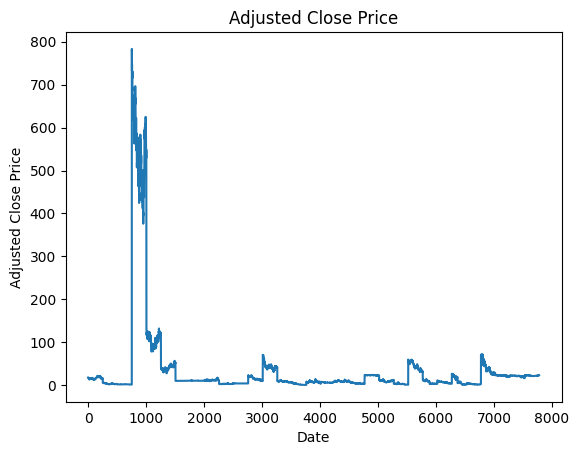

In [7]:
df['adjclose'].plot(title='Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [8]:
print("Column Names:", df.columns)



Column Names: Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [9]:
# Create a DataFrame for the 'adjclose' column
output_var = pd.DataFrame(df['adjclose'])

# Define the list of features
features = ['Open', 'High', 'Low', 'Volume']

# Display the new DataFrame and the features list to verify
print(output_var.head())
print("Features:", features)

    adjclose
0  17.760000
1  17.660000
2  16.950001
3  16.170000
4  15.710000
Features: ['Open', 'High', 'Low', 'Volume']


In [10]:
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Scale the feature columns using MinMaxScaler
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])

    # Create a new DataFrame for the scaled features
    feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)

    # Display the first few rows of the scaled features DataFrame
    print("Scaled Features:")
    print(feature_transform.head())

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


In [11]:
# Check if all feature columns exist in the DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Create a DataFrame for the features and target
    X = df[features]
    y = df[target]

    # Scale the feature columns using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot the predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Stock Prices')
    plt.show()

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


In [12]:
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features in the DataFrame: {missing_features}")
else:
    # Scaling the features
    scaler = MinMaxScaler()
    feature_transform = scaler.fit_transform(df[features])

    # Convert to DataFrame to maintain original indexing
    feature_transform = pd.DataFrame(feature_transform, columns=features, index=df.index)

    # Display the first few rows of the scaled DataFrame
    feature_transform.head()

Missing features in the DataFrame: ['Open', 'High', 'Low', 'Volume']


In [16]:
df.describe()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000
